In [71]:
import svc
import importlib
importlib.reload(svc)
from svc import SVC
import numpy as np

from sklearn.datasets import make_circles , make_blobs
import matplotlib.pyplot as plt

In [72]:
def get_q(x):
    max_q = 0
    for i in range(len(x)):
        for j in range(i,len(x)):
            if np.linalg.norm(x[i] - x[j])**2 >= max_q:
                max_q = np.linalg.norm(x[i] - x[j])**2
    return 1/max_q


In [73]:
def calc_and_print_result_classicSVC(p, q, x, y):
    svc = SVC(x,p = p,q=q, is_log=False )
    svc.kernel_matrix()
    svc.find_beta()
    svc.init_vectors_and_rad()
    svc.cluster()
    svc.return_clusters()
    print(f'svs: {len(svc.svs)}  bsv: {len(svc.bsvs)}')
    print(f'p = {p}, q = {q}')
    svc.show_plot()  
   


In [74]:
def calc_and_print_result_LEESVC(p, q, x, y):
    svc = SVC(x,p = p,q=q, is_log=False )
    svc.kernel_matrix()
    svc.find_beta()
    svc.init_vectors_and_rad()
    svc.LeeDecomposingDataIntoGroups()
    svc.my_part_2()
    print(f'svs: {len(svc.svs)}  bsv: {len(svc.bsvs)} sevs: {len(svc.SEVs)}')
    print(f'p = {p}, q = {q}')

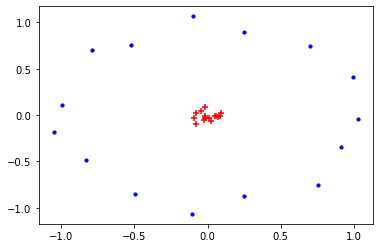

In [75]:

n_samples = 30

samples, labels = make_circles(n_samples=n_samples, factor=.01, noise=.05, random_state=7)

bluecircle = samples[labels==0]
redcircle  = samples[labels==1]

plt.figure()
plt.scatter(bluecircle[:, 0], bluecircle[:, 1], c='b', marker='o', s=10)
plt.scatter(redcircle[:, 0], redcircle[:, 1], c='r', marker='+', s=30)
plt.show()

q = get_q(samples)
p = 0.2


Прошло времени: 0.8262531757354736
svs: 18  bsv: 5
p = 0.2, q = 0.21969149223453094


c:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


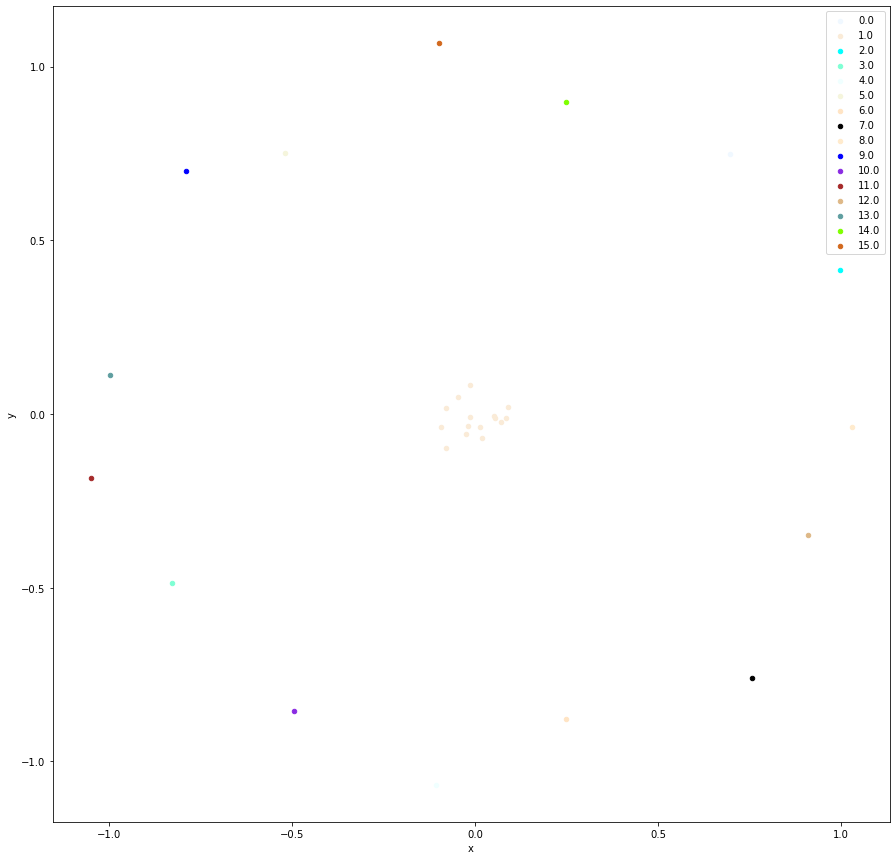

In [76]:
calc_and_print_result_classicSVC(p,q,samples,y=labels)

Прошло времени: 0.2713010311126709


c:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


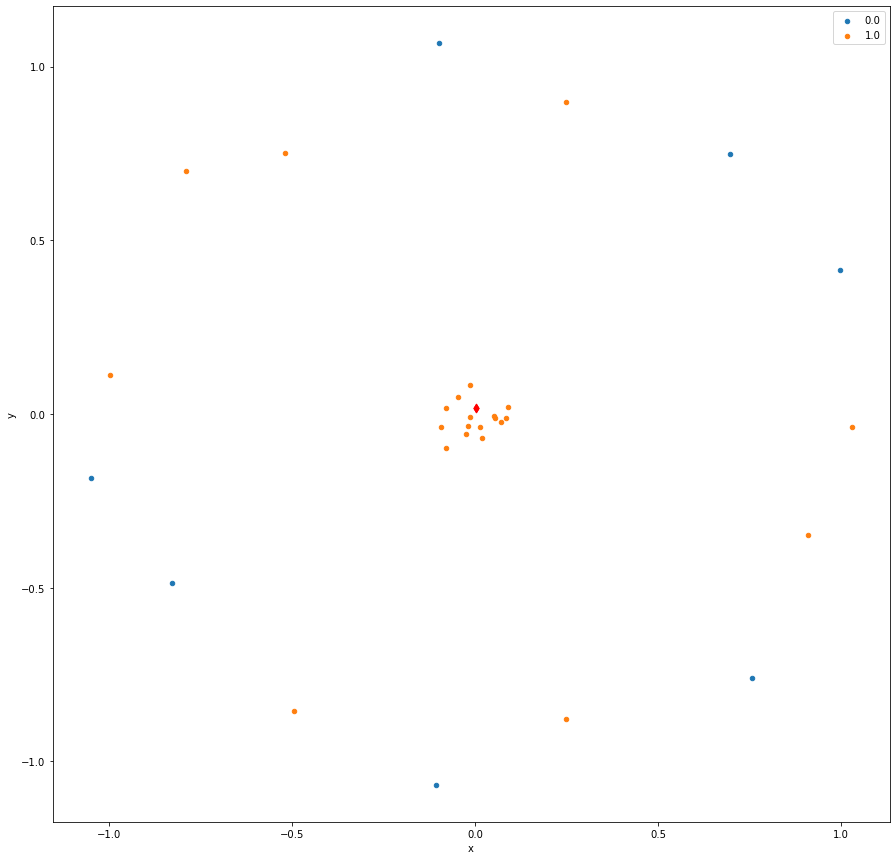

svs: 18  bsv: 5 sevs: 2
p = 0.2, q = 0.21969149223453094


In [77]:
calc_and_print_result_LEESVC(p,q,samples,y=labels)

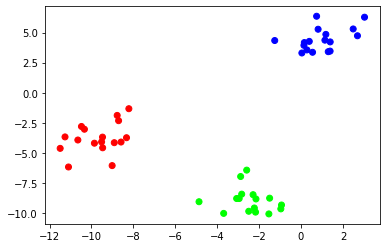

In [78]:
x,y = make_blobs(n_samples=50, random_state=333, centers=3)
plt.figure()
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='brg')

Прошло времени: 2.075857162475586


c:\Users\User\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


IndexError: list index out of range

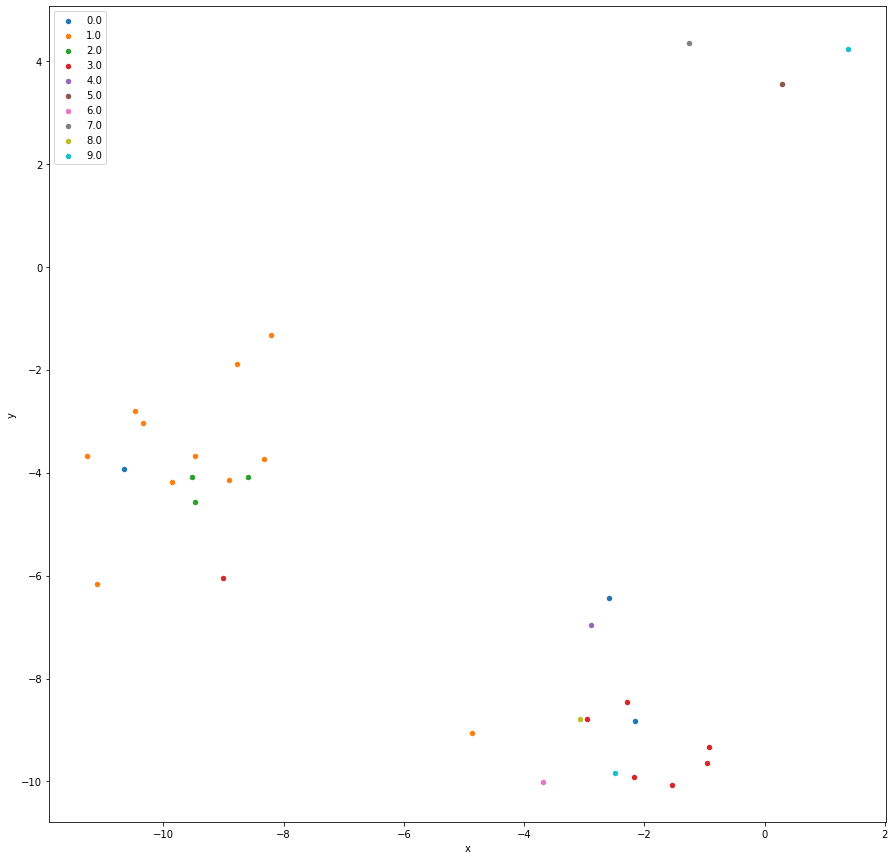

In [79]:
calc_and_print_result_LEESVC(p,q,x,y)